# Health Insurance Cross Sell

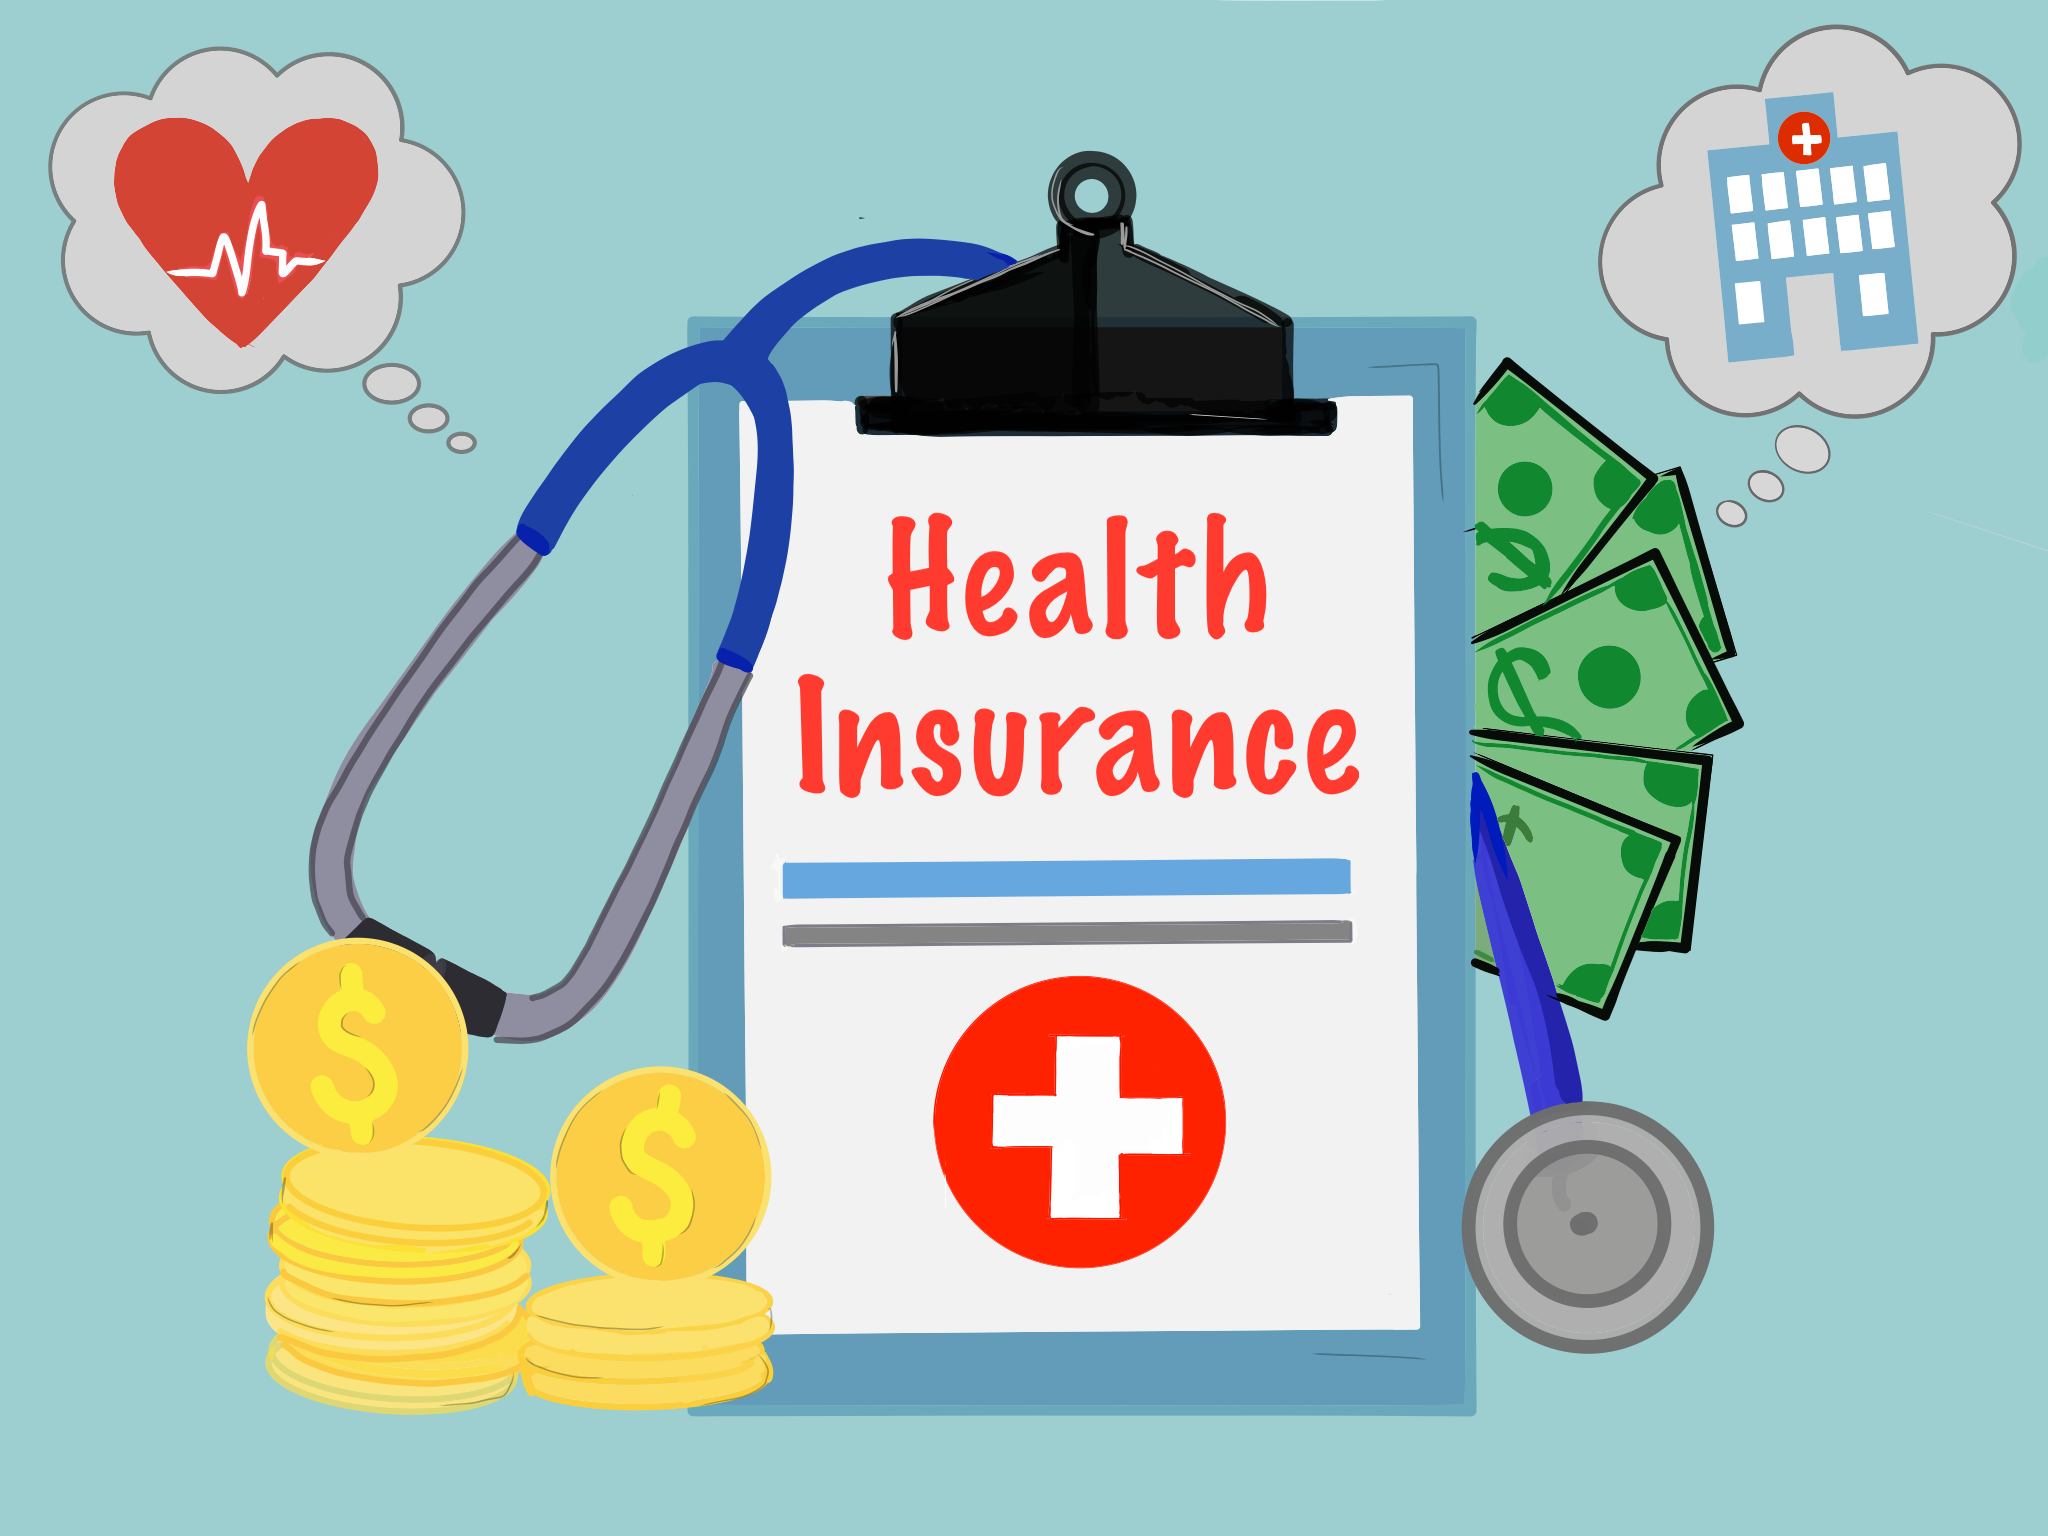

A Health Insurance company is analysing the possibility to offer their clients a new product: a car insurance. As well as the health insurance, the clients of this new product should pay annually to obtain a certain value assured by the company, for their cars. The company surveyed nearly 380,000 clients about the interest in joining a new car insurance product last year. All clients showed interest or not in purcharsing the new insurance product and these responses were saved in a database along with other client attributes. The product teams selected 127,000 new customers who did not respond to the survey to participate in a campaign, in which they will receive an offer of the new car insurance product. The offer will be made by the sales team through phone calls. However, the sales team has the capacity to make 20,000 calls within the campaign period.

**Table of contents**

* 1. [Business Problem](#business_problem)
* 2. [Imports](#imports)
    * 2.1. [Helper Functions](#helper_functions)
* 3. [Data Extraction](#data_extraction)
    * 3.1. [Data Summary](#data_summary)
    * 3.2. [Schema Query](#schema_query)
    * 3.3. [Table query](#table_query)
    * 3.4. [Collect Data using Psycopg2](#data_psyco)
    * 3.5. [Collect Data using Pandas](#data_pandas)

# 1. Business Problem<a id='business_problem'></a>

* **What is the context like?**

    * A Health Insure company is evaluating the possibility to offer their clients a new car insurance product.

* **What is the root cause of the problem?**

    * The sales team needs to make calls to offer clients the new product, but they can make only 20,000 calls during the campaign.

* **Who is the Stakeholder of the problem?**

    * The company's CEO.

* **How will the solution be?**

    * Elaborate a model to predict if a client is interested or not on the new product to prioritize clients with higher chances to purcharse it.

    * Questions to be answered:

        1. Main insights about the most relevant client's attributes interested in purcharsing the car insurance.
        2. What percentage of clients interested in purcharsing car insurance will the sales team be able to contact by making 20,000 calls?
        3. And if the sales teams capacity increases to 40,000 calls, what percentage of customers interested in purcharsing car insurance will the sales team be able to contact?
        4. How many calls does the sales team need to make to contact 80% of customers interested in purcharsing car insurance?

# 2. Imports<a id='imports'></a>

In [1]:
from credentials import credentials

import psycopg2 as pg
import pandas.io.sql as pqsl

import pandas as pd

## 2.1. Helper Functions<a id='helper_functions'></a>

# 3. Data Extraction<a id='data_extraction'></a>

## 3.1. Data Summary<a id='data_summary'></a>

* **Id**: customer's unique identifier.
* **Gender**: customer gender.
* **Age**: customer's age.
* **Driving License**: 0, the customer is not allowed to drive and 1, the customer is allowed to drive (CNH – National Driver's License)
* **Region Code**: customer's region code.
* **Previously Insured**: 0, customer does not have car insurance and 1, customer already has car insurance.
* **Vehicle Age**: age of the vehicle.
* **Vehicle Damage**: 0, customer has never had their vehicle damaged in the past and 1, customer has had their vehicle damaged in the past.
* **Annual Premium**: amount the customer paid the company for annual health insurance.
* **Policy sales channel**: anonymous code for the customer contact channel.
* **Vintage**: number of days the customer joined the company by purchasing health insurance.
* **Response**: 0, the customer is not interested and 1, the customer is interested.

## 3.2. Schema Query -> pa004<a id='schema_query'></a>

In [2]:
#engine to databse
conn = pg.connect(host = credentials.host,
           database = credentials.database,
           port = credentials.port, 
           user = credentials.user,
           password = credentials.password)

In [3]:
#create cursor
cur = conn.cursor()

# query
query_schema = """
    SELECT nspname
    FROM pg_catalog.pg_namespace

"""

# execute query
cur.execute(query_schema)

# return query results
record = cur.fetchall()
print(record)

#close cursor
cur.close()

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',), ('pg_temp_4',), ('pg_toast_temp_4',), ('pa005',), ('pg_temp_9',), ('pg_toast_temp_9',)]


## 3.3. Table Query<a id='table_query'></a>

In [4]:
#create cursor
cursor = conn.cursor()

query_tables = """
    SELECT tablename
    FROM pg_tables
    WHERE schemaname = 'pa004'
"""

# execute query
cursor.execute(query_schema)

# return query results
record = cursor.fetchall()
print(record)

#close cursor
cursor.close()

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',), ('pg_temp_4',), ('pg_toast_temp_4',), ('pa005',), ('pg_temp_9',), ('pg_toast_temp_9',)]


## 3.4. Collect Data using Psycopg2<a id='data_psyco'></a>

In [5]:
#create cursor
cursor = conn.cursor()

# query
query_tables_users = """
    SELECT *
    FROM pa004.users u
    WHERE u.age > 44
    LIMIT 10
"""

# execute query
cursor.execute(query_tables_users)

#  return query results
record = cursor.fetchall()
print(record)

# close cursor
cursor.close()

[(2, 'Male', 76, 3.0, 26.0), (3, 'Male', 47, 28.0, 26.0), (8, 'Female', 56, 28.0, 26.0), (11, 'Female', 47, 35.0, 124.0), (14, 'Male', 76, 28.0, 13.0), (15, 'Male', 71, 28.0, 30.0), (20, 'Female', 60, 33.0, 124.0), (21, 'Male', 65, 28.0, 124.0), (22, 'Male', 49, 28.0, 124.0), (27, 'Female', 51, 28.0, 124.0)]


In [6]:
# convert tuples to dataframe
data = pd.DataFrame(record)
data.head()

,0,1,2,3,4
0,2,Male,76,3.0,26.0
1,3,Male,47,28.0,26.0
2,8,Female,56,28.0,26.0
3,11,Female,47,35.0,124.0
4,14,Male,76,28.0,13.0


## 3.5. Collect Data using Pandas<a id='data_pandas'></a>

In [7]:
# query
query_tables_users = """
    SELECT *
    FROM pa004.users
    LIMIT 10
"""

df1 = pd.read_sql(query_tables_users, conn)
df1.head()

,id,gender,age,region_code,policy_sales_channel
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,4,Male,21,11.0,152.0
4,5,Female,29,41.0,152.0


In [8]:
# query
query_tables_users = """
    SELECT *
    FROM pa004.vehicle
    LIMIT 10
"""

df2 = pd.read_sql(query_tables_users, conn)
df2.head()

,id,driving_license,vehicle_age,vehicle_damage
0,1,1,> 2 Years,Yes
1,2,1,1-2 Year,No
2,3,1,> 2 Years,Yes
3,4,1,< 1 Year,No
4,5,1,< 1 Year,No


In [9]:
# query
query_tables_users = """
    SELECT *
    FROM pa004.insurance
    LIMIT 10
"""

df3 = pd.read_sql(query_tables_users, conn)
df3.head()

,id,previously_insured,annual_premium,vintage,response
0,1,0,40454.0,217,1
1,2,0,33536.0,183,0
2,3,0,38294.0,27,1
3,4,1,28619.0,203,0
4,5,1,27496.0,39,0


In [10]:
# query
query_tables_users = """
    SELECT *
    FROM pa004.users u
    LEFT JOIN pa004.vehicle v ON (u.id = v.id)
    LEFT JOIN pa004.insurance i ON (u.id = i.id)
    WHERE u.age > 44
    LIMIT 10
"""

df_raw = pd.read_sql(query_tables_users, conn)
df_raw.head()

,id,gender,age,region_code,policy_sales_channel,id,driving_license,vehicle_age,vehicle_damage,id,previously_insured,annual_premium,vintage,response
0,39,Male,45,8.0,124.0,39,1,1-2 Year,Yes,39,0,42297.0,264,0
1,114,Male,50,30.0,26.0,114,1,1-2 Year,Yes,114,0,34271.0,229,1
2,126,Male,49,28.0,124.0,126,1,1-2 Year,Yes,126,0,2630.0,88,0
3,131,Male,50,28.0,26.0,131,1,1-2 Year,Yes,131,0,57389.0,155,1
4,137,Female,59,39.0,124.0,137,1,1-2 Year,Yes,137,0,32775.0,158,0


In [11]:
# drop columns id 
df_raw = df_raw.drop(columns = ['id'])
df_raw.head()

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0
1,Male,50,30.0,26.0,1,1-2 Year,Yes,0,34271.0,229,1
2,Male,49,28.0,124.0,1,1-2 Year,Yes,0,2630.0,88,0
3,Male,50,28.0,26.0,1,1-2 Year,Yes,0,57389.0,155,1
4,Female,59,39.0,124.0,1,1-2 Year,Yes,0,32775.0,158,0


In [12]:
# close connection
conn.close()